### Impotar librerias

In [4]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq
import gzip
import missingno as msno
import re
import ast



In [5]:
# Inicializo una lista vacía para almacenar las filas de datos
row = []

# Abro el archivo utilizando 'with' para asegurar la gestión adecuada de recursos (apertura y cierre)
with open("Data/output_steam_games.json") as file:
    # Itero sobre cada línea del archivo para procesar las filas
    for line in file.readlines():
        # Convierto cada línea (que se espera que contenga datos en formato JSON) en un objeto Python
        data = json.loads(line)
        # Agrego el objeto convertido a la lista 'row'
        row.append(data)

# Creo un DataFrame utilizando la lista 'row' que contiene los datos procesados
juegos = pd.DataFrame(row)


In [6]:
# se muestra el dataframe

juegos

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"


In [7]:
# Calcula estadísticas descriptivas para el DataFrame 
juegos.describe()


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
count,24083,28852,32133,30085,32135,30068,31972,32133,31465,30758.00,32135,32133,28836
unique,8239,883,32094,30054,32135,3582,15395,32132,4649,162.00,2,32132,10992
top,Ubisoft,[Action],Soundtrack,Soundtrack,http://store.steampowered.com/app/761140/Lost_...,2012-10-16,"[Casual, Simulation]",http://steamcommunity.com/app/612880/reviews/?...,[Single-player],4.99,False,612880,Ubisoft - San Francisco
freq,385,1880,3,3,1,100,1292,2,2794,4278.00,30188,2,1259


In [8]:
# Devuelve una tupla que representa las dimensiones del DataFrame 'games'
juegos.shape


(120445, 13)

In [9]:
# Muestra información sobre el DataFrame 'games'
juegos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24083 non-null  object
 1   genres        28852 non-null  object
 2   app_name      32133 non-null  object
 3   title         30085 non-null  object
 4   url           32135 non-null  object
 5   release_date  30068 non-null  object
 6   tags          31972 non-null  object
 7   reviews_url   32133 non-null  object
 8   specs         31465 non-null  object
 9   price         30758 non-null  object
 10  early_access  32135 non-null  object
 11  id            32133 non-null  object
 12  developer     28836 non-null  object
dtypes: object(13)
memory usage: 11.9+ MB


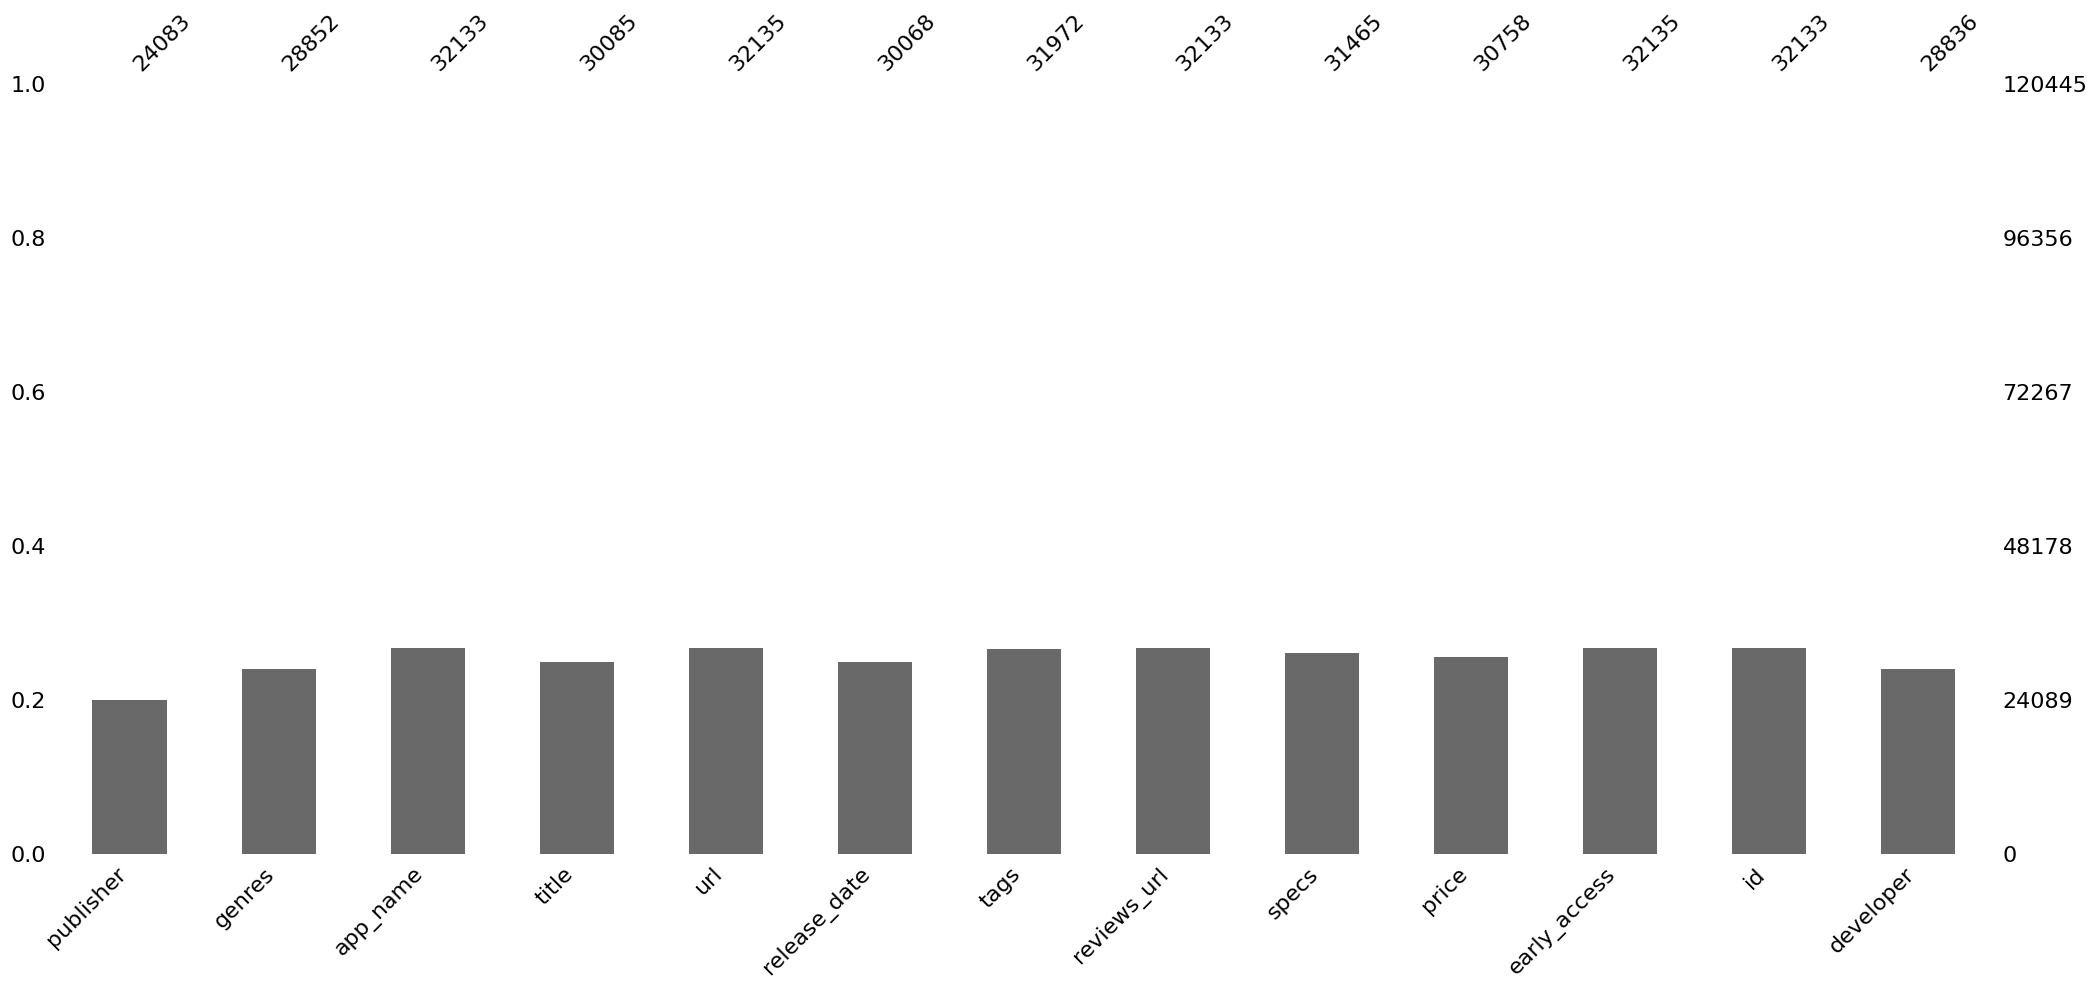

In [10]:
#Este gráfico de barras muestra la cantidad total de valores nulos en cada columna. 
#Puede proporcionar una visión general rápida de la proporción de valores nulos en cada columna.

msno.bar(juegos)
plt.show()

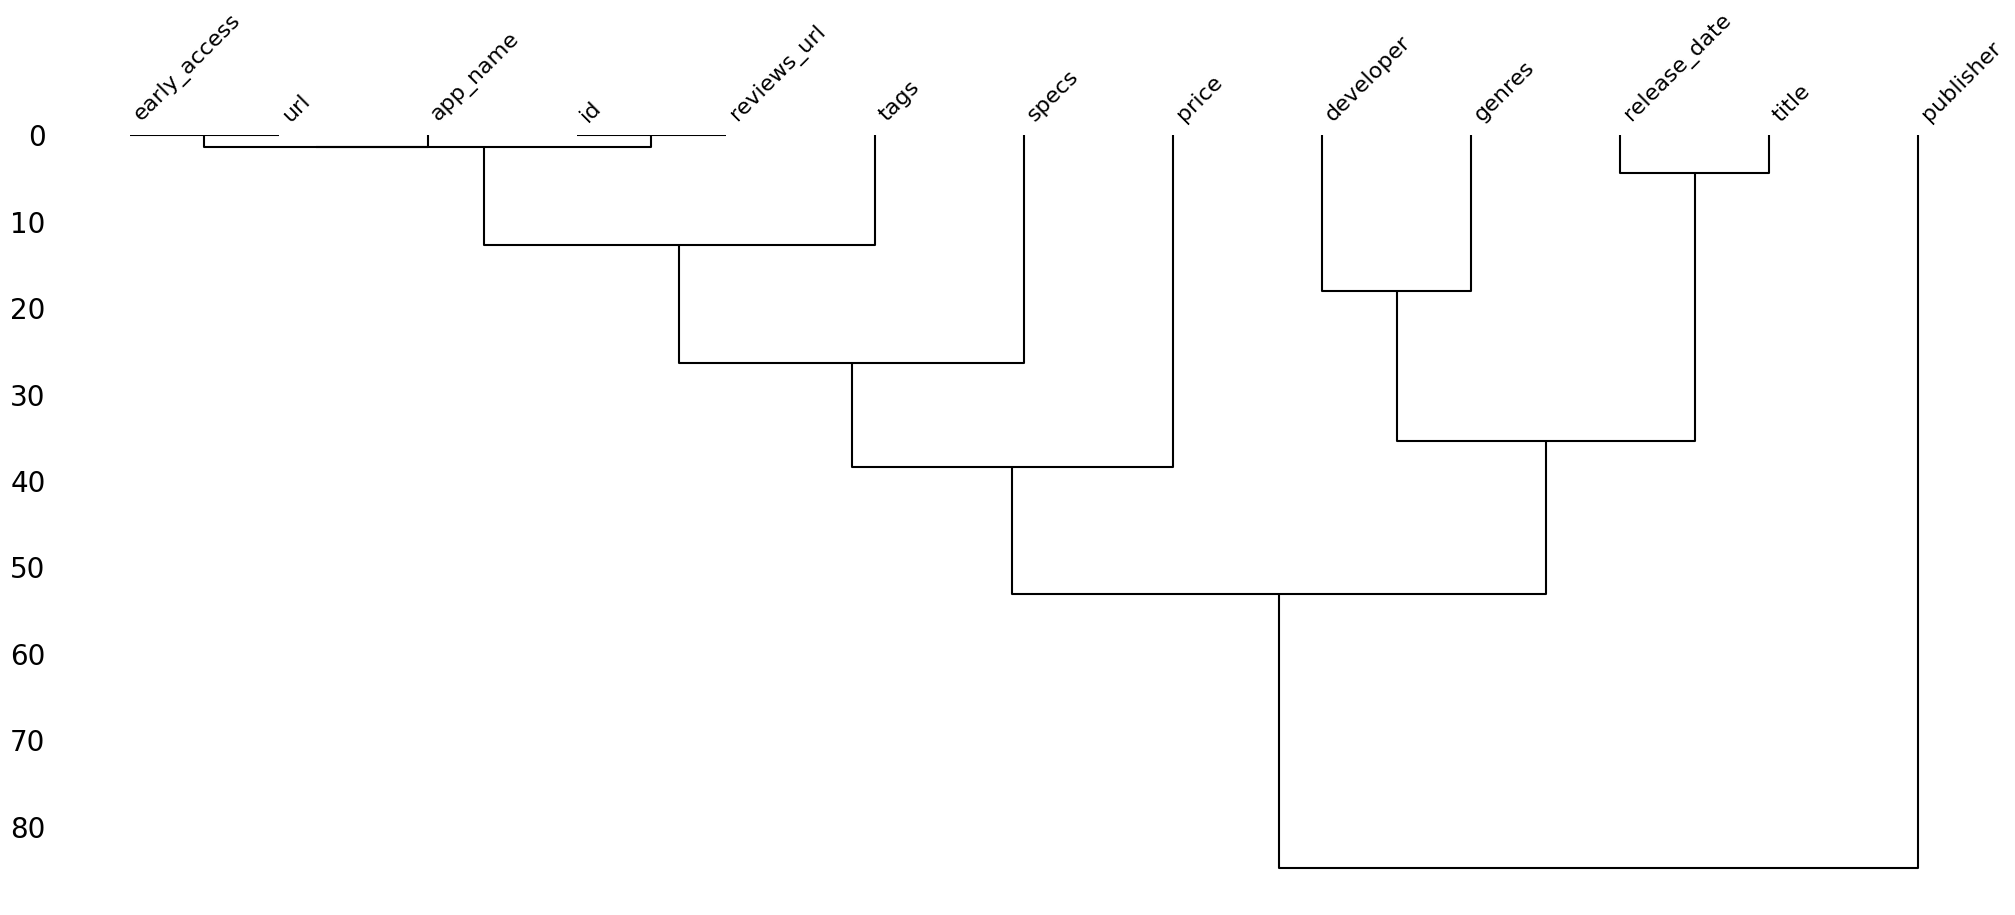

In [11]:
#Este gráfico utiliza un dendrograma para agrupar columnas con patrones de nulidad similares. 
#Es útil para identificar relaciones entre columnas con valores nulos.

msno.dendrogram(juegos)
plt.show()

In [ ]:
# se eliminan las columnas con la mayor cantidad de datos faltantes 

Juegos_de_Steam = juegos.drop(columns=["user_id", "steam_id", "items", "items_count"])

In [ ]:
Juegos_de_Steam

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,1.49,"[Single-player, Steam Achievements]",1.99,False,773640,NaN,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,4.24,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,NaN,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,NaN,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,NaN,"xropi,stev3ns"


#### Se buscan valores nulos y valores duplicados


In [ ]:

# Calcula la cantidad de valores nulos por columna en el DataFrame 'df'
nulos = Juegos_de_Steam.isnull().sum()

# Muestra el resultado, que es una Serie con la cantidad de nulos por cada columna

nulos


publisher          96362
genres             91593
app_name           88312
title              90360
url                88310
release_date       90377
tags               88473
reviews_url        88312
discount_price    120220
specs              88980
price              89687
early_access       88310
id                 88312
metascore         117768
developer          91609
dtype: int64

In [ ]:
## Calcula la cantidad total de valores nulos en el DataFrame 'juegos_de_steam'
# utilizando isnull() para generar una máscara booleana de nulos,
# sum() para obtener la cantidad de nulos por columna,
# y nuevamente sum() para sumar esos resultados y obtener la cantidad total de nulos.

nulos_totales= Juegos_de_Steam.isnull().sum().sum()
nulos_totales

1406985

In [ ]:
# Elimina las filas que contienen valores nulos en todas sus columnas en el DataFrame 'Juegos_de_Steam'
# El parámetro 'how="all"' especifica que se eliminarán solo las filas donde todos los valores son nulos
Juegos_de_Steam = Juegos_de_Steam.dropna(how="all").reset_index(drop=True)

# Reinicia los índices del DataFrame después de eliminar las filas con valores nulos
# El parámetro 'drop=True' evita la adición de la antigua columna de índices como una nueva columna en el DataFrame
Juegos_de_Steam


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,Kotoshiro
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,NaN,Secret Level SRL
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,NaN,Poolians.com
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,0.83,[Single-player],0.99,False,767400,NaN,彼岸领域
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,1.79,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,1.49,"[Single-player, Steam Achievements]",1.99,False,773640,NaN,"Nikita ""Ghost_RUS"""
32131,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,4.24,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,NaN,Sacada
32132,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,NaN,Laush Dmitriy Sergeevich
32133,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,NaN,"xropi,stev3ns"


In [ ]:
# Lista de columnas que se utilizarán para identificar duplicados, en la columna 'id'
analysis_columnas = ['id']

# Filtra las filas duplicadas basándose en las columnas especificadas en 'analysis_columnas'
duplicados_de_columnas = Juegos_de_Steam[Juegos_de_Steam.duplicated(subset=analysis_columnas)]

# Muestra las filas duplicadas identificadas en el DataFrame 'Juegos_de_Steam'
duplicados_de_columnas

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer
14573,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/Wolfe...,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",http://steamcommunity.com/app/612880/reviews/?...,NaN,"[Single-player, Steam Achievements, Full contr...",59.99,False,612880,86,Machine Games
30961,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",NaN,NaN,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,NaN,91,"Rocksteady Studios,Feral Interactive (Mac)"


In [ ]:
# Filtra el DataFrame 'Juegos_de_Steam' para obtener las filas donde la columna 'developer' es igual a "Machine Games"
Juegos_de_Steam[Juegos_de_Steam["developer"] == "Machine Games"]


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer
12237,Bethesda Softworks,[Action],Wolfenstein II: The Freedom Chronicles - Seaso...,Wolfenstein II: The Freedom Chronicles - Seaso...,http://store.steampowered.com/app/650410/Wolfe...,2017-11-07,"[Gore, Action, Violent]",http://steamcommunity.com/app/650410/reviews/?...,NaN,"[Single-player, Downloadable Content, Full con...",24.99,False,650410,NaN,Machine Games
13318,Bethesda Softworks,[Action],Wolfenstein II: The Freedom Chronicles - Episo...,Wolfenstein II: The Freedom Chronicles - Episo...,http://store.steampowered.com/app/624620/Wolfe...,2017-12-13,"[Action, Violent]",http://steamcommunity.com/app/624620/reviews/?...,NaN,"[Single-player, Downloadable Content, Steam Ac...",9.99,False,624620,NaN,Machine Games
13894,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",http://steamcommunity.com/app/612880/reviews/?...,NaN,"[Single-player, Steam Achievements, Full contr...",59.99,False,612880,86,Machine Games
14573,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/Wolfe...,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",http://steamcommunity.com/app/612880/reviews/?...,NaN,"[Single-player, Steam Achievements, Full contr...",59.99,False,612880,86,Machine Games
28996,Bethesda Softworks,[Action],Wolfenstein: The New Order,Wolfenstein: The New Order,http://store.steampowered.com/app/201810/Wolfe...,2014-05-19,"[FPS, Action, Shooter, Alternate History, Firs...",http://steamcommunity.com/app/201810/reviews/?...,NaN,"[Single-player, Steam Achievements, Partial Co...",19.99,False,201810,81,Machine Games


#### observando  visualmente se puede ver que las filas 14573 y 13894 estan duplicadas 

In [ ]:
# Creo una máscara booleana para filtrar las filas en las que la columna 'developer' es igual a "Rocksteady Studios,Feral Interactive (Mac)"

Juegos_de_Steam[Juegos_de_Steam["developer"] == "Rocksteady Studios,Feral Interactive (Mac)"]


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer
1068,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260/Batma...,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",http://steamcommunity.com/app/200260/reviews/?...,NaN,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,200260,91,"Rocksteady Studios,Feral Interactive (Mac)"
30961,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",NaN,NaN,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,NaN,91,"Rocksteady Studios,Feral Interactive (Mac)"
31617,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"[Action, Batman, Stealth, Adventure, Third Per...",http://steamcommunity.com/app/35140/reviews/?b...,NaN,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,35140,91,"Rocksteady Studios,Feral Interactive (Mac)"


#### observando visualmente se puede apreciar que las filas 30961 y 1068 son duplicadas salvo por el "id" que es nulo, mientras que la fila 1068 tiene "id". 

In [ ]:
# Lista de índices de filas duplicadas que se desean eliminar
duplicados_de_columnas = [14573, 30961]

# Elimino las filas duplicadas del DataFrame 'Juegos_de_Steam' utilizando los índices proporcionados en la lista
Juegos_de_Steam = Juegos_de_Steam.drop(duplicados_de_columnas)

In [ ]:
# Lista de columnas a analizar para duplicados

analysis_columnas = ['id']

# Filtrar las filas duplicadas basándose en las columnas "duplicados de columnas"

duplicados_de_columnas = Juegos_de_Steam[Juegos_de_Steam.duplicated(subset=analysis_columnas)]

# muesrtra las filas duplicadas si las hay
duplicados_de_columnas


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer


In [ ]:
# Obtener la forma (número de filas y columnas) del DataFrame 'Juegos_de_Steam'

Juegos_de_Steam.shape


(32133, 15)

#### Transformacion de datos en las columnas a un formato adecuado para su manipulacion

In [ ]:
# conozco que tipos de datos tiene el dataset para saber cual debo modificar

tipos_de_datos = Juegos_de_Steam.dtypes
tipos_de_datos

publisher          object
genres             object
app_name           object
title              object
url                object
release_date       object
tags               object
reviews_url        object
discount_price    float64
specs              object
price              object
early_access       object
id                 object
metascore          object
developer          object
dtype: object

#### Normalizacion de datos de columnas JSON 

In [ ]:
analisis_tipos = {"columna": [], "tipos_de_dato": []}  # Un diccionario vacío para almacenar la información del bucle

for col in Juegos_de_Steam.columns:  # Un bucle que recorre las columnas del DataFrame
    analisis_tipos["columna"].append(col)
    analisis_tipos["tipos_de_dato"].append(Juegos_de_Steam[col].apply(type).unique())

analisis_df = pd.DataFrame(analisis_tipos)
analisis_df


,columna,tipos_de_dato
0,publisher,"[<class 'str'>, <class 'float'>]"
1,genres,"[<class 'list'>, <class 'float'>]"
2,app_name,"[<class 'str'>, <class 'float'>]"
3,title,"[<class 'str'>, <class 'float'>]"
4,url,[<class 'str'>]
5,release_date,"[<class 'str'>, <class 'float'>]"
6,tags,"[<class 'list'>, <class 'float'>]"
7,reviews_url,"[<class 'str'>, <class 'float'>]"
8,discount_price,[<class 'float'>]
9,specs,"[<class 'list'>, <class 'float'>]"


#### Se necesita extraer el año de la columna "release_date" para poder hacer las consultas para las funciones: def UsersRecommend( año : int ), def UsersWorstDeveloper( año : int ) y def PlayTimeGenre( genero : str )

In [ ]:
# ver la estructura de las fechas
Juegos_de_Steam["release_date"]

0        2018-01-04
1        2018-01-04
2        2017-07-24
3        2017-12-07
4               NaN
            ...    
32130    2018-01-04
32131    2018-01-04
32132    2018-01-04
32133    2017-09-02
32134           NaN
Name: release_date, Length: 32133, dtype: object

In [ ]:
# Calcula la cantidad de juegos en el DataFrame 'Juegos_de_Steam' para cada fecha de lanzamiento
conteo_fechas_lanzamiento = Juegos_de_Steam["release_date"].value_counts()
conteo_fechas_lanzamiento


release_date
2012-10-16    100
2017-08-31     92
2017-09-26     89
2017-06-21     82
2017-07-25     78
             ... 
1988-04-16      1
2013-08-24      1
2011-05-07      1
2010-08-21      1
2018-10-01      1
Name: count, Length: 3582, dtype: int64

In [ ]:
# Extrae el año de la columna 'release_date' utilizando una expresión regular y crea una nueva columna 'Año_estreno'
Juegos_de_Steam['Año_estreno'] = Juegos_de_Steam['release_date'].str.extract(r'(\d{4})').fillna('sin dato')

# Muestra el DataFrame 'steam_games' con la nueva columna 'Año_estreno'
Juegos_de_Steam


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer,Año_estreno
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,Kotoshiro,2018
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,NaN,Secret Level SRL,2018
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,NaN,Poolians.com,2017
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,0.83,[Single-player],0.99,False,767400,NaN,彼岸领域,2017
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,1.79,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,sin dato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,1.49,"[Single-player, Steam Achievements]",1.99,False,773640,NaN,"Nikita ""Ghost_RUS""",2018
32131,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,4.24,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,NaN,Sacada,2018
32132,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,NaN,Laush Dmitriy Sergeevich,2018
32133,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,NaN,"xropi,stev3ns",2017


In [ ]:
# ver la estructura de la columna "price"

Juegos_de_Steam["price"]

0                4.99
1        Free To Play
2        Free to Play
3                0.99
4                2.99
             ...     
32130            1.99
32131            4.99
32132            1.99
32133            4.99
32134            4.99
Name: price, Length: 32133, dtype: object

In [ ]:
# Calcula y muestra la frecuencia de cada valor único en la columna 'price'

Juegos_de_Steam["price"].value_counts()

price
4.99           4278
9.99           3902
2.99           3429
0.99           2607
1.99           2541
               ... 
74.76             1
32.99             1
14.95             1
26.99             1
Free to Use       1
Name: count, Length: 162, dtype: int64

#### Se remplazan los valores nulos a formato flotante

In [ ]:
# Función para convertir los datos de la columna "price" a valores flotantes 0.0
def cambio_a_float(valor):
    if pd.isna(valor):  # Verifica si el valor es NaN
        return 0.0
    try:
        flotante = float(valor)  # Intenta convertir el valor a flotante
        return flotante
    except (ValueError, TypeError):  # Maneja excepciones en caso de error
        return 0.0

# Aplica la función a la columna "price" del DataFrame 'Juegos_de_Steam'
Juegos_de_Steam["price"] = Juegos_de_Steam["price"].apply(cambio_a_float)


In [ ]:
# ver como quedo la estructura de la columna "price"

Juegos_de_Steam["price"]

0        4.99
1        0.00
2        0.00
3        0.99
4        2.99
         ... 
32130    1.99
32131    4.99
32132    1.99
32133    4.99
32134    4.99
Name: price, Length: 32133, dtype: float64

#### Se buscan valores atipicos en la columna "price"

In [ ]:
# Calcula el primer cuartil (Q1) de la columna 'price' 
Q1 = Juegos_de_Steam['price'].quantile(0.25)

# Calcula el tercer cuartil (Q3) de la columna 'price' 
Q3 = Juegos_de_Steam['price'].quantile(0.75)

# Calcula el rango intercuartílico (IQR) de la columna 'price'
IQR = Q3 - Q1

# Imprime los valores de Q1, Q3 e IQR
print(Q1)
print(Q3)
print(IQR)


1.99
9.99
8.0


In [ ]:
# Calcula el umbral superior para identificar posibles valores atípicos en la columna 'price'
umbral_superior = Q3 + 1.5 * IQR

# Calcula el umbral inferior para identificar posibles valores atípicos en la columna 'price'
umbral_inferior = Q1 - 1.5 * IQR

# Imprime los valores de los umbrales superior e inferior
print(umbral_superior)
print(umbral_inferior)


21.990000000000002
-10.01


In [ ]:
# Identifica los valores atípicos superiores en la columna 'price' 
outliers_superiores = Juegos_de_Steam[Juegos_de_Steam['price'] > umbral_superior]

# Identifica los valores atípicos inferiores en la columna 'price' 
outliers_inferiores = Juegos_de_Steam[Juegos_de_Steam['price'] < umbral_inferior]

# Imprime los valores atípicos superiores e inferiores encontrados
print(outliers_superiores)
print(outliers_inferiores)


                              publisher  \
8                Poppermost Productions   
18               Poppermost Productions   
51                                  NaN   
59                               SimBin   
234                              NCsoft   
...                                 ...   
31938  Firedog Creative Company Limited   
31956                               NaN   
31959                 CarX Technologies   
32070                  DreamInCode B.V.   
32098                        Koch Media   

                                                  genres  \
8              [Free to Play, Indie, Simulation, Sports]   
18             [Free to Play, Indie, Simulation, Sports]   
51                                                   NaN   
59                                              [Racing]   
234                         [Massively Multiplayer, RPG]   
...                                                  ...   
31938                                  [RPG, Simulation]   
319

In [ ]:
# verifico los outliers inferiores en forma de dataframe

outliers_inferiores

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer,Año_estreno


In [ ]:
# verifico los outliers superiores en forma de un dataframe

outliers_superiores

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer,Año_estreno
8,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,http://store.steampowered.com/app/774278/SNOW_...,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",http://steamcommunity.com/app/774278/reviews/?...,NaN,"[Single-player, Multi-player, Online Multi-Pla...",29.99,False,774278,NaN,Poppermost Productions,2018
18,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - Lifetime Pack,SNOW - Lifetime Pack,http://store.steampowered.com/app/774279/SNOW_...,2018-01-03,"[Free to Play, Indie, Simulation, Sports]",http://steamcommunity.com/app/774279/reviews/?...,NaN,"[Single-player, Multi-player, Online Multi-Pla...",59.99,False,774279,NaN,Poppermost Productions,2018
51,NaN,NaN,Medicalholodeck Personal Version,NaN,http://store.steampowered.com/app/769350/Medic...,NaN,[Education],http://steamcommunity.com/app/769350/reviews/?...,NaN,"[Tracked Motion Controllers, Seated, Standing]",29.99,False,769350,NaN,NaN,sin dato
59,SimBin,[Racing],RACE - The WTCC Game,RACE - The WTCC Game,http://store.steampowered.com/app/4230/RACE__T...,2006-11-24,"[Racing, Simulation]",http://steamcommunity.com/app/4230/reviews/?br...,NaN,"[Single-player, Multi-player]",39.99,False,4230,NA,SimBin,2006
234,NCsoft,"[Massively Multiplayer, RPG]",Guild Wars Trilogy,Guild Wars Trilogy,http://store.steampowered.com/app/29570/Guild_...,2008-09-25,"[RPG, Massively Multiplayer, MMORPG, PvP]",http://steamcommunity.com/app/29570/reviews/?b...,NaN,"[Multi-player, MMO]",29.99,False,29570,NaN,ArenaNet®,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31938,Firedog Creative Company Limited,"[RPG, Simulation]",愛神餐館2,愛神餐館2,http://store.steampowered.com/app/769680/2/,2017-12-29,"[RPG, Simulation, Anime]",http://steamcommunity.com/app/769680/reviews/?...,31.49,[Single-player],34.99,False,769680,NaN,Firedog Creative Company Limited,2017
31956,NaN,NaN,Three Kingdoms VR - Jade Knight (光之三國VR - 青龍騎),NaN,http://store.steampowered.com/app/731120/Three...,NaN,"[Action, Casual, Simulation, Sports]",http://steamcommunity.com/app/731120/reviews/?...,NaN,"[Single-player, Steam Achievements, Steam Clou...",24.99,False,731120,NaN,NaN,sin dato
31959,CarX Technologies,"[Massively Multiplayer, Racing, Simulation, Sp...",CarX Drift Racing Online - Deluxe,CarX Drift Racing Online - Deluxe,http://store.steampowered.com/app/776950/CarX_...,2017-12-28,"[Massively Multiplayer, Simulation, Racing, Sp...",http://steamcommunity.com/app/776950/reviews/?...,NaN,"[Single-player, Multi-player, Online Multi-Pla...",29.99,False,776950,NaN,CarX Technologies,2017
32070,DreamInCode B.V.,"[Action, Adventure, Casual, Indie, Simulation,...",Mesozoica,Mesozoica,http://store.steampowered.com/app/719590/Mesoz...,2018-01-02,"[Early Access, Simulation, Strategy, Casual, I...",http://steamcommunity.com/app/719590/reviews/?...,25.49,[Single-player],29.99,True,719590,NaN,"DreamInCode B.V.,Squadron Interactive",2018


In [ ]:
# ver la estructura de la columna "geres"

Juegos_de_Steam["genres"]

0            [Action, Casual, Indie, Simulation, Strategy]
1                     [Free to Play, Indie, RPG, Strategy]
2        [Casual, Free to Play, Indie, Simulation, Sports]
3                              [Action, Adventure, Casual]
4                                                      NaN
                               ...                        
32130                [Casual, Indie, Simulation, Strategy]
32131                            [Casual, Indie, Strategy]
32132                          [Indie, Racing, Simulation]
32133                                      [Casual, Indie]
32134                                                  NaN
Name: genres, Length: 32133, dtype: object

#### Con la funcion explode se dividen los generos de la columna "genres"

In [ ]:
# Divide las listas de géneros en filas individuales, duplicando las demás columnas según sea necesario
Juegos_de_Steam = Juegos_de_Steam.explode("genres")

# Elimina las filas donde la columna "genres" tiene valores nulos
Juegos_de_Steam = Juegos_de_Steam.dropna(subset=["genres"])

# Resultado: Juegos_de_Steam ahora tiene cada género en una fila individual sin valores nulos en la columna "genres"


In [ ]:


Juegos_de_Steam

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer,Año_estreno
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,Kotoshiro,2018
0,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,Kotoshiro,2018
0,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,Kotoshiro,2018
0,Kotoshiro,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,Kotoshiro,2018
0,Kotoshiro,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,Kotoshiro,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32132,Laush Studio,Indie,Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,NaN,Laush Dmitriy Sergeevich,2018
32132,Laush Studio,Racing,Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,NaN,Laush Dmitriy Sergeevich,2018
32132,Laush Studio,Simulation,Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,NaN,Laush Dmitriy Sergeevich,2018
32133,SIXNAILS,Casual,EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,NaN,"xropi,stev3ns",2017


In [ ]:
# Muestra información sobre el DataFrame Juegos_de_Steam, incluyendo el tipo de datos y la cantidad de valores no nulos

Juegos_de_Steam.info()


<class 'pandas.core.frame.DataFrame'>
Index: 71551 entries, 0 to 32133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       59112 non-null  object 
 1   genres          71551 non-null  object 
 2   app_name        71549 non-null  object 
 3   title           71549 non-null  object 
 4   url             71551 non-null  object 
 5   release_date    71498 non-null  object 
 6   tags            71505 non-null  object 
 7   reviews_url     71551 non-null  object 
 8   discount_price  580 non-null    float64
 9   specs           70994 non-null  object 
 10  price           71551 non-null  float64
 11  early_access    71551 non-null  object 
 12  id              71551 non-null  object 
 13  metascore       5467 non-null   object 
 14  developer       71201 non-null  object 
 15  Año_estreno     71551 non-null  object 
dtypes: float64(2), object(14)
memory usage: 9.3+ MB


In [ ]:
# Lista de columnas donde se reemplazarán los valores nulos
remplazo_nulo = ["publisher", "app_name", "title", "developer"]

# Genera un DataFrame llamado 'null' con las columnas seleccionadas y los valores nulos reemplazados por "Sin Datos"
null = Juegos_de_Steam[remplazo_nulo].fillna("Sin Datos")

# Elimina las columnas a reemplazar y concatena los DataFrames 'Juegos_de_Steam' y 'null'
Juegos_de_Steam = pd.concat([Juegos_de_Steam.drop(remplazo_nulo, axis=1), null], axis=1)
Juegos_de_Steam


,genres,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,Año_estreno,publisher,app_name,title,developer
0,Action,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
0,Casual,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
0,Indie,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
0,Simulation,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
0,Strategy,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32132,Indie,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,NaN,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
32132,Racing,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,NaN,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
32132,Simulation,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,NaN,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
32133,Casual,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,NaN,2017,SIXNAILS,EXIT 2 - Directions,EXIT 2 - Directions,"xropi,stev3ns"


In [ ]:
Juegos_de_Steam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71551 entries, 0 to 32133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          71551 non-null  object 
 1   url             71551 non-null  object 
 2   release_date    71498 non-null  object 
 3   tags            71505 non-null  object 
 4   reviews_url     71551 non-null  object 
 5   discount_price  580 non-null    float64
 6   specs           70994 non-null  object 
 7   price           71551 non-null  float64
 8   early_access    71551 non-null  object 
 9   id              71551 non-null  object 
 10  metascore       5467 non-null   object 
 11  Año_estreno     71551 non-null  object 
 12  publisher       71551 non-null  object 
 13  app_name        71551 non-null  object 
 14  title           71551 non-null  object 
 15  developer       71551 non-null  object 
dtypes: float64(2), object(14)
memory usage: 9.3+ MB


In [ ]:
Juegos_de_Steam = Juegos_de_Steam.copy()

# Ruta y nombre del archivo CSV donde se guardará el DataFrame 'Juegos_de_Steam' sin índices y codificado en UTF-8
limpio = "Data/steam_games.csv"

# Guarda el DataFrame 'Juegos_de_Steam' en un archivo CSV en la ubicación especificada
Juegos_de_Steam.to_csv(limpio, index=False, encoding="utf-8")


In [ ]:
# Lee el archivo CSV 'steam_games.csv' y carga los datos en el DataFrame 'Juegos_de_Steam'
Juegos_de_Steam = pd.read_csv("Data/steam_games.csv")

# Especifica la ubicación y el nombre del archivo Parquet de salida
salida = "Data/steam_games.parquet"

# Convierte el DataFrame 'Juegos_de_Steam' a una tabla Parquet usando Apache Arrow
data = pa.Table.from_pandas(Juegos_de_Steam)

# Escribe la tabla Parquet en el archivo de salida especificado
pq.write_table(data, salida)


#### Extraccion Transformacion y Carga: australian_user_reviews.json

In [ ]:
# Crea una lista vacía 'row' para almacenar las filas del archivo JSON
row = []

# Abre el archivo 'australian_user_reviews.json' en modo de lectura con codificación utf-8
with open("Data/australian_user_reviews.json", 'r', encoding='utf-8') as file:
    # Itera sobre cada línea del archivo y agrega las filas a la lista 'row'
    for line in file.readlines():
        # Utiliza ast.literal_eval para interpretar las líneas del JSON y convertirlas en objetos de Python
        row.append(ast.literal_eval(line))

# Genera el DataFrame 'reviews' a partir de la lista de filas 'row'
reseñas = pd.DataFrame(row)


In [ ]:
reseñas

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [ ]:
# Creo una nueva columna 'division_columna' al explotar la columna 'reviews'
# Esto implica dividir las listas presentes en 'reviews' y crear nuevas filas para cada elemento de la lista

division_columna = reseñas.explode('reviews')

division_columna


,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted November 5, 20..."
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted July 15, 2011...."
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted April 21, 2011..."
1,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted June 24, 2014...."
1,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted September 8, 2..."
...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"{'funny': '', 'posted': 'Posted July 10.', 'la..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"{'funny': '', 'posted': 'Posted July 8.', 'las..."
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,"{'funny': '1 person found this review funny', ..."
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,"{'funny': '', 'posted': 'Posted July 20.', 'la..."


In [ ]:
# Utilizo json_normalize para normalizar la columna 'reviews', que contiene datos en formato JSON

normalizacion = pd.json_normalize(division_columna['reviews'].dropna())

normalizacion

,funny,posted,last_edited,item_id,helpful,recommend,review
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...
59300,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59301,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59302,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59303,,Posted July 20.,,730,No ratings yet,True,:D


In [ ]:
# Restablezco el índice del DataFrame normalizado y actualizo inplace

normalizacion.reset_index(inplace=True)

normalizacion

,index,funny,posted,last_edited,item_id,helpful,recommend,review
0,0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...
59300,59300,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59301,59301,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59302,59302,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59303,59303,,Posted July 20.,,730,No ratings yet,True,:D


In [ ]:
# Restablezco el índice del DataFrame dividido y actualizo inplace

division_columna.reset_index(inplace=True)

division_columna

,index,user_id,user_url,reviews
0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted November 5, 20..."
1,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted July 15, 2011...."
2,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted April 21, 2011..."
3,1,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted June 24, 2014...."
4,1,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted September 8, 2..."
...,...,...,...,...
59328,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"{'funny': '', 'posted': 'Posted July 10.', 'la..."
59329,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"{'funny': '', 'posted': 'Posted July 8.', 'las..."
59330,25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,"{'funny': '1 person found this review funny', ..."
59331,25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,"{'funny': '', 'posted': 'Posted July 20.', 'la..."


In [ ]:
# Concateno el DataFrame dividido con la normalización de la columna 'reviews'
reseña = pd.concat([division_columna, normalizacion], axis=1)

# Elimino la columna original 'reviews' ya que ahora está normalizada y no es necesaria
reseña = reseña.drop(columns=['reviews'])

# Muestro el DataFrame resultante
reseña


,index,user_id,user_url,index,funny,posted,last_edited,item_id,helpful,recommend,review
0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0.0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1.0,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2.0,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,1,js41637,http://steamcommunity.com/id/js41637,3.0,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,1,js41637,http://steamcommunity.com/id/js41637,4.0,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...,...,...,...
59328,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59329,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59330,25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59331,25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Elimino la columna 'index' que se generó como resultado de un reset anterior
reseña = reseña.drop(columns="index")

# Muestro el DataFrame resultante
reseña


,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...,...
59328,76561198312638244,http://steamcommunity.com/profiles/76561198312...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59329,76561198312638244,http://steamcommunity.com/profiles/76561198312...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59330,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59331,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
analisis_tipos = {"columna": [], "tipos_de_dato": []}  # Un diccionario vacío para almacenar la información del bucle

for col in reseña.columns:  # Un bucle que recorre las columnas del DataFrame
    analisis_tipos["columna"].append(col)
    analisis_tipos["tipos_de_dato"].append(reseña[col].apply(type).unique())

analisis_df = pd.DataFrame(analisis_tipos)
analisis_df

,columna,tipos_de_dato
0,user_id,[<class 'str'>]
1,user_url,[<class 'str'>]
2,funny,"[<class 'str'>, <class 'float'>]"
3,posted,"[<class 'str'>, <class 'float'>]"
4,last_edited,"[<class 'str'>, <class 'float'>]"
5,item_id,"[<class 'str'>, <class 'float'>]"
6,helpful,"[<class 'str'>, <class 'float'>]"
7,recommend,"[<class 'bool'>, <class 'float'>]"
8,review,"[<class 'str'>, <class 'float'>]"


In [ ]:
# Identifico las filas duplicadas en el DataFrame 'reseña'

filas_duplicadas = reseña.loc[reseña.duplicated()]

# Muestro las filas duplicadas
filas_duplicadas


,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
1112,bobseagull,http://steamcommunity.com/id/bobseagull,,"Posted September 24, 2015.",,346110,1 of 1 people (100%) found this review helpful,True,yep
2894,ImSeriouss,http://steamcommunity.com/id/ImSeriouss,,"Posted January 13, 2014.",,211820,No ratings yet,True,If you want to play this game.. expect glithes...
2895,ImSeriouss,http://steamcommunity.com/id/ImSeriouss,,"Posted January 10, 2014.",,440,No ratings yet,True,Really good game! fun! Good for people who wan...
2896,ImSeriouss,http://steamcommunity.com/id/ImSeriouss,,"Posted March 19, 2012.",,42680,No ratings yet,True,Good but a bit overdone. Still love it though.
3582,76561198062039159,http://steamcommunity.com/profiles/76561198062...,,"Posted December 11, 2015.",,730,0 of 1 people (0%) found this review helpful,True,I rate it R8/Revolver
...,...,...,...,...,...,...,...,...,...
59327,76561198312638244,http://steamcommunity.com/profiles/76561198312...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59328,76561198312638244,http://steamcommunity.com/profiles/76561198312...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59329,76561198312638244,http://steamcommunity.com/profiles/76561198312...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59331,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,NaN,NaN,NaN,NaN,NaN,NaN,NaN


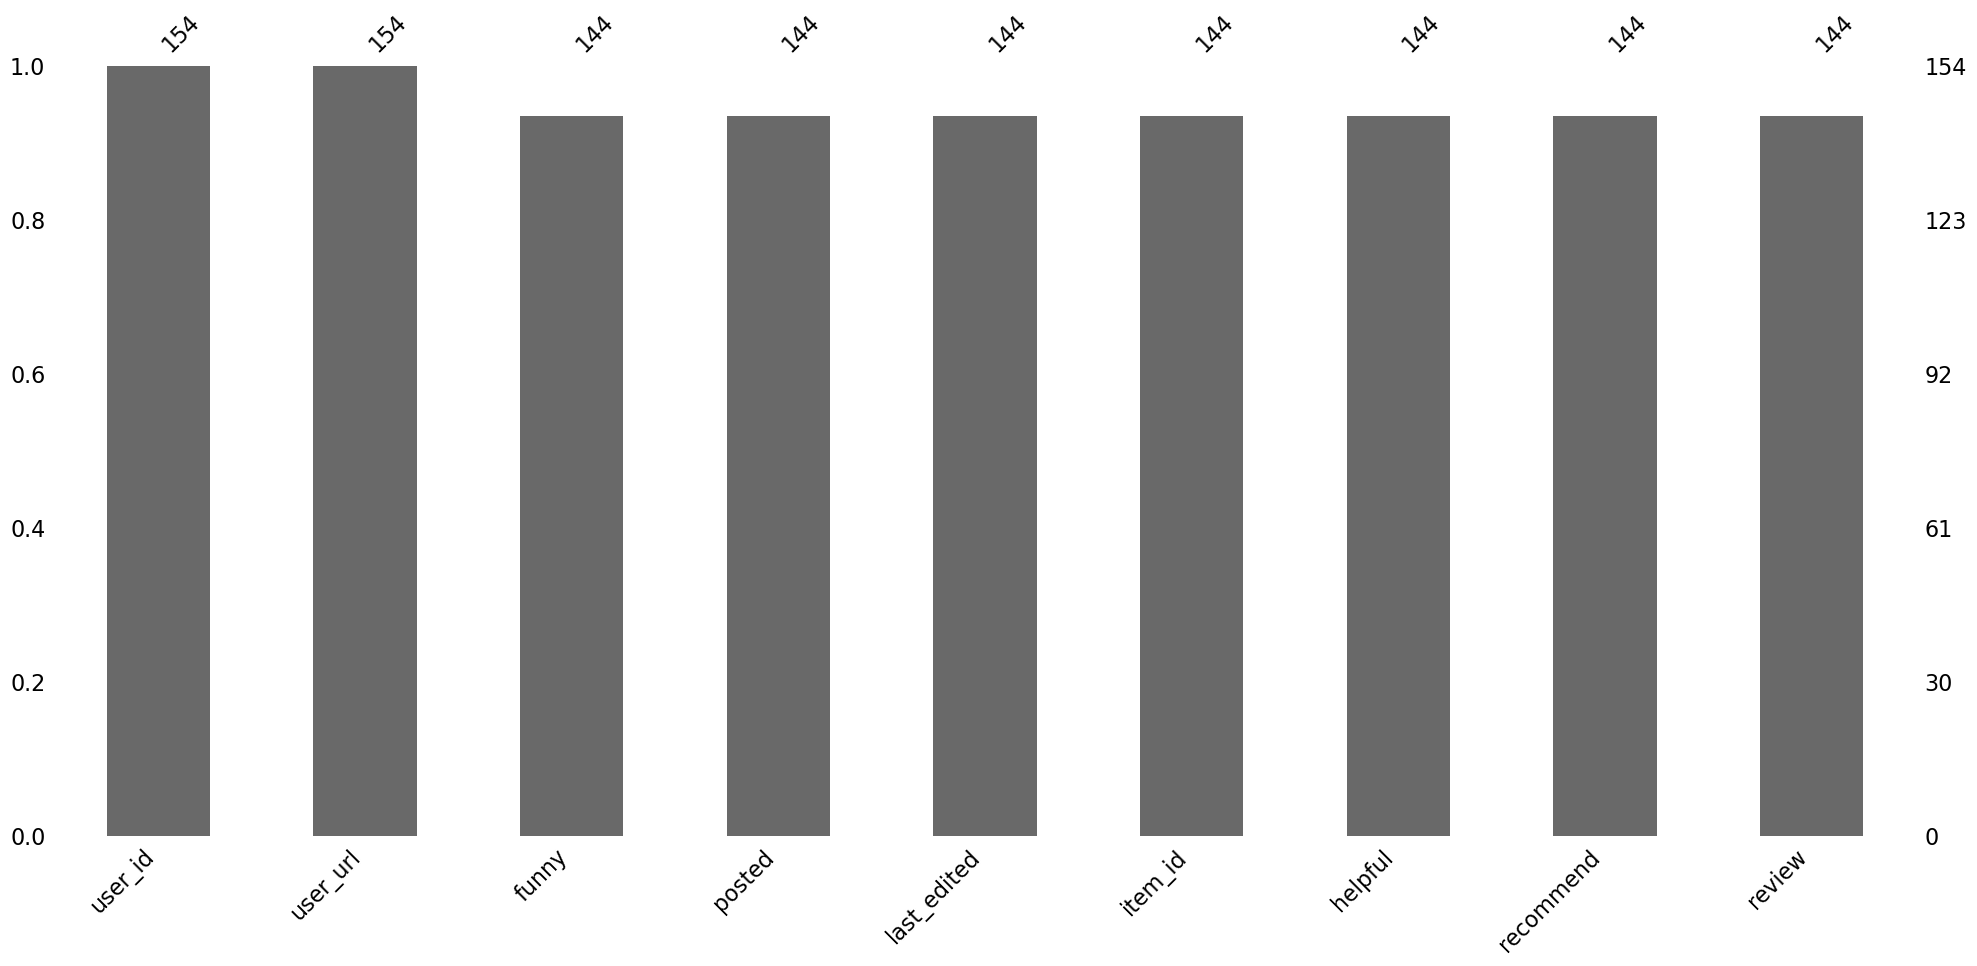

In [ ]:
msno.bar(filas_duplicadas)
plt.show()

In [ ]:
# Elimino las filas duplicadas en el DataFrame 'reseña', conservando la primera ocurrencia
reseña = reseña.drop_duplicates(keep='first')

# Muestro el DataFrame resultante después de eliminar duplicados
reseña


,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...,...
59323,76561198306599751,http://steamcommunity.com/profiles/76561198306...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59324,Ghoustik,http://steamcommunity.com/id/Ghoustik,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59325,76561198310819422,http://steamcommunity.com/profiles/76561198310...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59326,76561198312638244,http://steamcommunity.com/profiles/76561198312...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Calculo la cantidad de valores nulos por columna en el DataFrame 'reseña'
nulos = reseña.isnull().sum()

# Muestro la cantidad de valores nulos por columna
nulos


user_id         0
user_url        0
funny          18
posted         18
last_edited    18
item_id        18
helpful        18
recommend      18
review         18
dtype: int64

In [ ]:
# Elimino las filas que contienen valores nulos en el DataFrame 'reseña'
# Luego, reseteo los índices del DataFrame
reseña = reseña.dropna().reset_index(drop=True)

# Muestro el DataFrame resultante después de eliminar filas con valores nulos y resetear los índices
reseña


,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...,...
59156,Fuckfhaisjnsnsjakaka,http://steamcommunity.com/id/Fuckfhaisjnsnsjakaka,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59157,3214213216,http://steamcommunity.com/id/3214213216,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59158,ChrisCoroner,http://steamcommunity.com/id/ChrisCoroner,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59159,CaptainAmericaCw,http://steamcommunity.com/id/CaptainAmericaCw,,Posted July 20.,,730,No ratings yet,True,:D


In [ ]:
# Extraigo la información relevante de la columna 'posted' utilizando una expresión regular
reseña['posted'] = reseña['posted'].str.extract(r'Posted ([\w\s\d,]+)')

# Muestro las primeras filas del DataFrame 'reseña' después de realizar la extracción
reseña.head()


,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"November 5, 2011",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"July 15, 2011",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"April 21, 2011",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,,"June 24, 2014",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,,"September 8, 2013",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...


In [ ]:
# Convierto la columna 'posted' a tipo de dato datetime, ignorando los errores (errors='coerce')
reseña['posted'] = pd.to_datetime(reseña['posted'], errors='coerce')

# Muestro las primeras filas del DataFrame 'reseña' después de realizar la conversión
reseña.head()


,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,2011-11-05,,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,2011-07-15,,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,2011-04-21,,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,,2014-06-24,,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,,2013-09-08,,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...


In [ ]:
# Creo una copia del DataFrame 'reseña'
reseña = reseña.copy()

# Indico la ubicación y nombre del archivo CSV de salida
limpio = 'Data/australian_user_review.csv'

# Guardo el DataFrame en un archivo CSV sin incluir el índice y utilizando codificación UTF-8
reseña.to_csv(limpio, index=False, encoding='utf-8')



In [ ]:
# Leo el archivo CSV 'australian_user_review.csv' y creo el DataFrame 'reseña'
reseña = pd.read_csv("Data/australian_user_review.csv")

# Indico la ubicación y nombre del archivo Parquet de salida
salida = "Data/australian_user_review.parquet"

# Transformo el DataFrame a formato Parquet utilizando pyarrow
data = pa.Table.from_pandas(reseña)

pq.write_table(data, salida)



#### Extraccion Transformacion y Carga: australian_user_items.json

In [ ]:
# Crea una lista vacía para almacenar los diccionarios de cada línea del archivo JSON
rows = []

# Abre el archivo "australian_users_items.json" con la codificación 'MacRoman'
with open("Data/australian_users_items.json", encoding='MacRoman') as f:
    # Recorre cada línea del archivo
    for line in f.readlines():
        # Interpreta cada línea como un diccionario y lo agregarlo a la lista
        rows.append(ast.literal_eval(line))

# Crea un DataFrame de pandas a partir de la lista de diccionarios
articulos = pd.DataFrame(rows)


In [ ]:
articulos

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [ ]:
# Muestra la forma (número de filas y columnas) del DataFrame 'articulos'

articulos.shape


(88310, 5)

#### Se realiza la normalizacion de los objetos en formato json desanidando las columnas del datframe "articulos"

In [ ]:

# se normaliza la columna 'items'
articulos = pd.json_normalize(rows, record_path=['items'], meta=['steam_id','items_count','user_id', 'user_url'] )
articulos


,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
...,...,...,...,...,...,...,...,...
5153204,346330,BrainBread 2,0,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153205,373330,All Is Dust,0,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153206,388490,One Way To Die: Steam Edition,3,3,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153207,521570,You Have 10 Seconds 2,4,4,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...


In [ ]:
analisis_tipos = {"columna": [], "tipos_de_dato": []}  # Un diccionario vacío para almacenar la información del bucle

for col in articulos.columns:  # Un bucle que recorre las columnas del DataFrame
    analisis_tipos["columna"].append(col)
    analisis_tipos["tipos_de_dato"].append(articulos[col].apply(type).unique())

analisis_df = pd.DataFrame(analisis_tipos)
analisis_df

,columna,tipos_de_dato
0,item_id,[<class 'str'>]
1,item_name,[<class 'str'>]
2,playtime_forever,[<class 'int'>]
3,playtime_2weeks,[<class 'int'>]
4,steam_id,[<class 'str'>]
5,items_count,[<class 'int'>]
6,user_id,[<class 'str'>]
7,user_url,[<class 'str'>]


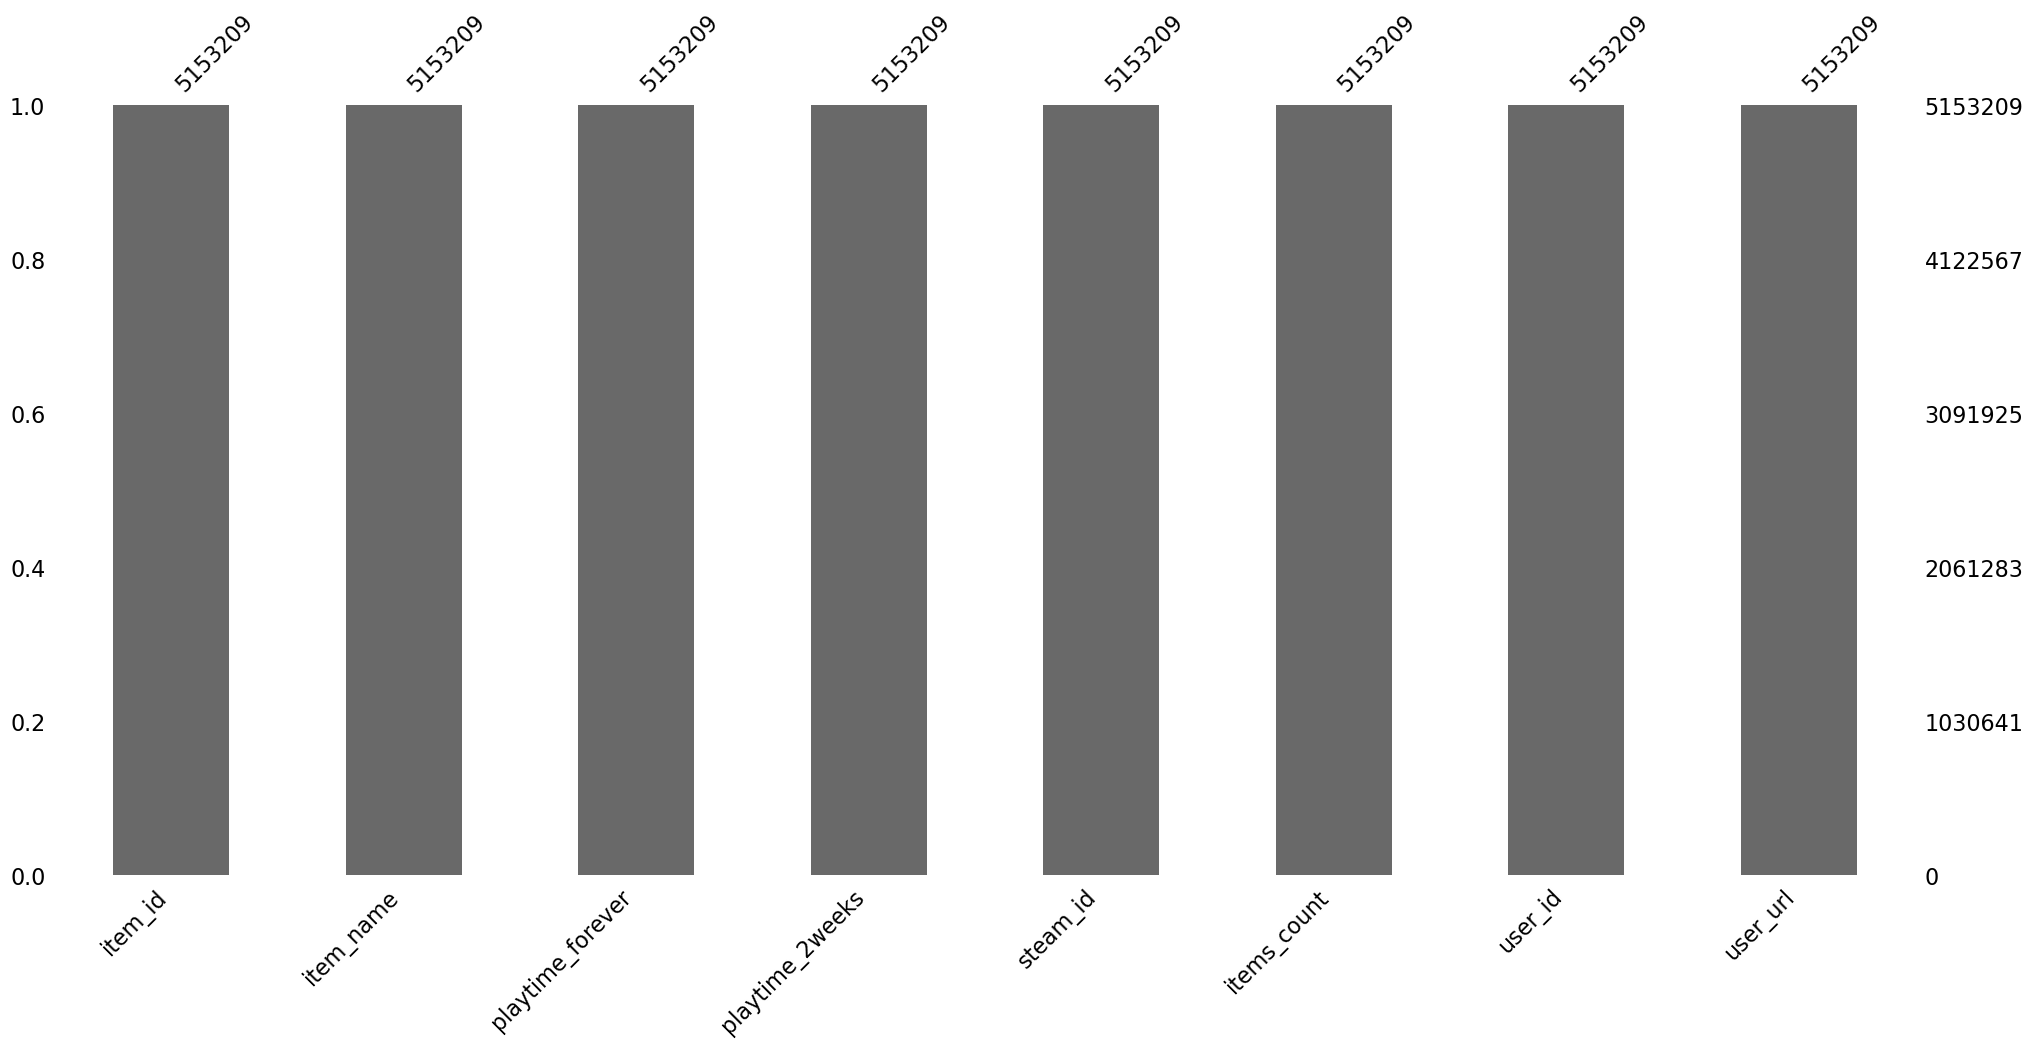

In [ ]:
msno.bar(articulos)
plt.show()

In [ ]:
# Muestra información sobre el DataFrame 'articulos', incluyendo tipos de datos y valores no nulos
articulos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           object
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   steam_id          object
 5   items_count       object
 6   user_id           object
 7   user_url          object
dtypes: int64(2), object(6)
memory usage: 314.5+ MB


In [ ]:
# Encuentra y muestra las filas duplicadas en el DataFrame 'articulos'

valores_duplicados = articulos.loc[articulos.duplicated()]

valores_duplicados


,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id,user_url
164294,20,Team Fortress Classic,5,0,76561198084006094,109,Nikiad,http://steamcommunity.com/id/Nikiad
164295,50,Half-Life: Opposing Force,0,0,76561198084006094,109,Nikiad,http://steamcommunity.com/id/Nikiad
164296,70,Half-Life,0,0,76561198084006094,109,Nikiad,http://steamcommunity.com/id/Nikiad
164297,130,Half-Life: Blue Shift,0,0,76561198084006094,109,Nikiad,http://steamcommunity.com/id/Nikiad
164298,220,Half-Life 2,198,0,76561198084006094,109,Nikiad,http://steamcommunity.com/id/Nikiad
...,...,...,...,...,...,...,...,...
4898223,213670,South Park‚Ñ¢: The Stick of Truth‚Ñ¢,725,0,76561198080057659,39,76561198080057659,http://steamcommunity.com/profiles/76561198080...
4898224,221910,The Stanley Parable,53,0,76561198080057659,39,76561198080057659,http://steamcommunity.com/profiles/76561198080...
4898225,261030,The Walking Dead: Season Two,253,0,76561198080057659,39,76561198080057659,http://steamcommunity.com/profiles/76561198080...
4898226,273110,Counter-Strike Nexon: Zombies,0,0,76561198080057659,39,76561198080057659,http://steamcommunity.com/profiles/76561198080...


In [ ]:
# Elimina las filas duplicadas en el DataFrame 'articulos', conservando la primera aparición de cada duplicado

articulos = articulos.drop_duplicates(keep='first')

articulos


,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
...,...,...,...,...,...,...,...,...
5153204,346330,BrainBread 2,0,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153205,373330,All Is Dust,0,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153206,388490,One Way To Die: Steam Edition,3,3,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153207,521570,You Have 10 Seconds 2,4,4,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...


In [ ]:
# Crea una copia del DataFrame 'articulos'
articulos = articulos.copy()

# Define la ruta del archivo CSV limpio

limpio = 'Data/australian_user_items.csv'

# Guarda el DataFrame 'articulos' en un archivo CSV sin incluir el índice y utilizando la codificación UTF-8
articulos.to_csv(limpio, index=False, encoding='utf-8')



In [ ]:
# Lee el archivo CSV que contiene los datos del DataFrame 'articulos'
articulos = pd.read_csv("Data/australian_user_items.csv")

# Define la ruta del archivo Parquet de salida
salida = "Data/australian_user_items.parquet"

# Convierte el DataFrame 'articulos' a una tabla PyArrow
data = pa.Table.from_pandas(articulos)

# Escribe la tabla en formato Parquet en el archivo de salida
pq.write_table(data, salida)
